# CS4622 - Machine Learning
# Project - Speaker, age, gender and accent recognition using wav2vec base

# Layer 11

# Load Data

In [2]:
!pip install kaggle seaborn imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 7.7 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 5.7 MB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.5.16-py3-none-any.whl size=110701 sha256=db39a24d33133f567177e9106654bf9c78c859d070537f7f6c5167ec3f61da22
  Stored in directory: /root/.cache/pip/wheels/5a/ab/50/e224f599a07faf6d398a8600796012da271b7e5e7f2a3ab2b8
Successfully built kaggle

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from collections import Counter

In [5]:
# Load the data
train_data = pd.read_csv('Data/train.csv')
valid_data = pd.read_csv('Data/valid.csv')
test_data = pd.read_csv('Data/test.csv')

In [6]:
train_data.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768,label_1,label_2,label_3,label_4
count,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,...,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28040.000000,28520.000000,28520.000000
mean,0.042487,0.068749,0.145547,-0.070646,-0.013539,0.003395,-0.041282,-0.028283,-0.106602,0.053686,...,-0.022102,-0.044743,-0.004380,0.049072,-0.028722,0.075717,30.498843,27.975107,0.799299,5.997125
std,0.048918,0.046354,0.065332,0.046671,0.027635,0.031248,0.026479,0.029632,0.070775,0.030945,...,0.053250,0.031361,0.025829,0.050536,0.032622,0.044879,17.328389,5.735913,0.400532,2.375567
min,-0.079594,-0.062608,-0.048545,-0.307243,-0.178347,-0.194771,-0.197551,-0.304828,-0.421257,-0.049723,...,-0.253255,-0.264549,-0.137827,-0.117697,-0.302399,-0.090777,1.000000,22.000000,0.000000,0.000000
25%,0.009979,0.037225,0.100677,-0.088834,-0.027810,-0.010617,-0.056682,-0.044344,-0.135110,0.033236,...,-0.042332,-0.056918,-0.018848,0.012599,-0.045226,0.045309,15.000000,25.000000,1.000000,6.000000
50%,0.024445,0.056119,0.123554,-0.057386,-0.011423,0.006173,-0.041501,-0.025805,-0.080715,0.045567,...,-0.007960,-0.037407,-0.004701,0.033121,-0.022919,0.064875,30.000000,27.000000,1.000000,6.000000
75%,0.058410,0.086358,0.173234,-0.039661,0.001544,0.021250,-0.026559,-0.009324,-0.057873,0.065670,...,0.012116,-0.024179,0.010218,0.072599,-0.006335,0.097642,46.000000,30.000000,1.000000,6.000000
max,0.274146,0.332288,0.454182,0.059362,0.196950,0.213127,0.124194,0.105714,0.192121,0.252320,...,0.209455,0.054555,0.215375,0.376414,0.125857,0.416291,60.000000,61.000000,1.000000,13.000000


In [7]:
valid_data.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768,label_1,label_2,label_3,label_4
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,...,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,736.000000,750.000000,750.000000
mean,0.041142,0.068132,0.144414,-0.071699,-0.014335,0.005012,-0.041338,-0.028710,-0.104901,0.055735,...,-0.022346,-0.044375,-0.003210,0.048600,-0.028046,0.075870,30.085333,28.330163,0.810667,6.117333
std,0.050381,0.044577,0.065617,0.046670,0.027015,0.032184,0.026705,0.029949,0.067765,0.032910,...,0.052256,0.029717,0.026850,0.048307,0.033131,0.046216,17.489060,6.518500,0.392035,2.227895
min,-0.045527,-0.010234,0.010127,-0.234127,-0.142823,-0.119803,-0.160783,-0.186423,-0.341590,0.000765,...,-0.218304,-0.184338,-0.091404,-0.024415,-0.193507,-0.027674,1.000000,22.000000,0.000000,0.000000
25%,0.008668,0.037506,0.099776,-0.090828,-0.028378,-0.009616,-0.057136,-0.044260,-0.133439,0.033916,...,-0.044694,-0.056552,-0.017796,0.012924,-0.045040,0.044613,15.000000,25.000000,1.000000,6.000000
50%,0.022257,0.056855,0.123209,-0.057944,-0.011907,0.007674,-0.041109,-0.024794,-0.080998,0.046069,...,-0.008110,-0.037571,-0.003993,0.033252,-0.023491,0.065279,29.000000,27.000000,1.000000,6.000000
75%,0.056045,0.087557,0.172653,-0.041033,0.000846,0.023121,-0.026541,-0.007770,-0.058813,0.067276,...,0.012768,-0.025167,0.010376,0.074504,-0.003644,0.099573,45.000000,30.000000,1.000000,6.000000
max,0.198685,0.248686,0.379200,0.034905,0.103058,0.130049,0.065060,0.054867,0.025304,0.193610,...,0.132555,0.024415,0.188908,0.284312,0.088437,0.304826,60.000000,61.000000,1.000000,13.000000


In [8]:
test_data.describe()

,ID,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_759,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768
count,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,...,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000
mean,372.500000,0.047221,0.073161,0.152006,-0.073786,-0.015699,0.001010,-0.042441,-0.025853,-0.112064,...,-0.072400,0.086293,0.048880,-0.131755,-0.024989,-0.046031,-0.005384,0.052052,-0.029437,0.075326
std,214.918589,0.051843,0.048840,0.069559,0.047683,0.028342,0.033084,0.027646,0.031228,0.073465,...,0.069055,0.034493,0.033851,0.065830,0.055624,0.033265,0.026382,0.053907,0.033854,0.045881
min,1.000000,-0.030249,-0.047112,0.013940,-0.272107,-0.123008,-0.135648,-0.147565,-0.179480,-0.371412,...,-0.304821,-0.005346,-0.056776,-0.433242,-0.221476,-0.191036,-0.097222,-0.021009,-0.182784,-0.079613
25%,186.750000,0.013209,0.040240,0.104068,-0.095898,-0.030631,-0.012868,-0.057837,-0.040730,-0.145321,...,-0.114271,0.062087,0.027299,-0.157180,-0.042629,-0.059523,-0.019146,0.013400,-0.044979,0.044502
50%,372.500000,0.025784,0.058224,0.124545,-0.060438,-0.013008,0.005135,-0.042333,-0.024419,-0.082976,...,-0.048288,0.078691,0.043628,-0.116079,-0.007627,-0.037106,-0.005709,0.033737,-0.022526,0.063100
75%,558.250000,0.064858,0.094326,0.183952,-0.041603,0.000873,0.019051,-0.027910,-0.006108,-0.061410,...,-0.020664,0.105507,0.065369,-0.086241,0.011605,-0.023696,0.008466,0.075669,-0.005441,0.096295
max,744.000000,0.209838,0.252174,0.397705,0.013285,0.097450,0.103555,0.084898,0.096079,0.022525,...,0.035437,0.219906,0.197192,-0.024020,0.154651,0.013828,0.127662,0.301095,0.064010,0.324071


# Handling missing values

In [9]:
# Handle missing values
missing_train = train_data.isnull().sum()
missing_valid = valid_data.isnull().sum()
print("missing_train:")
print(missing_train)
print("\nmissing_valid:")
print(missing_valid)

missing_train:
feature_1        0
feature_2        0
feature_3        0
feature_4        0
feature_5        0
              ... 
feature_768      0
label_1          0
label_2        480
label_3          0
label_4          0
Length: 772, dtype: int64

missing_valid:
feature_1       0
feature_2       0
feature_3       0
feature_4       0
feature_5       0
               ..
feature_768     0
label_1         0
label_2        14
label_3         0
label_4         0
Length: 772, dtype: int64


There are missing values in label_2.

In [10]:
# Impute missing values
imputer = SimpleImputer(strategy='mean')
columns = ['label_2']
imputer.fit(train_data[columns])

train_data[columns] = imputer.transform(
    train_data[columns]).round().astype(int)
valid_data[columns] = imputer.transform(
    valid_data[columns]).round().astype(int)

In [11]:
# Check missing values again
labels = ["label_1", "label_2", "label_3", "label_4"]
train_data[labels].isnull().sum()

label_1    0
label_2    0
label_3    0
label_4    0
dtype: int64

In [12]:
valid_data[labels].isnull().sum()

label_1    0
label_2    0
label_3    0
label_4    0
dtype: int64

# Support Functions

In [13]:
# Function for plot class distribution

def plot_class_distribution(y):
    class_counts = y.value_counts()
    plt.figure(figsize=(18, 6))
    plt.title("Class distribution")
    sns.barplot(x=class_counts.index, y=class_counts.values, color='blue')
    plt.show()

In [14]:
# Function for robust scaling

def robust_scale_data(X_train, X_valid, X_test):
    scaler = RobustScaler()
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
    X_valid_scaled = pd.DataFrame(scaler.transform(X_valid))
    X_test_scaled = pd.DataFrame(scaler.transform(X_test))
    return X_train_scaled, X_valid_scaled, X_test_scaled

In [15]:
# Function for standard scaling

def standard_scale_data(X_train, X_valid, X_test):
    scaler = StandardScaler()
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
    X_valid_scaled = pd.DataFrame(scaler.transform(X_valid))
    X_test_scaled = pd.DataFrame(scaler.transform(X_test))
    return X_train_scaled, X_valid_scaled, X_test_scaled


In [16]:
# Function for Principal Component Analysis

def pca(X_train, X_valid, X_test, n_components=0.95, svd_solver='full'):
    pca = PCA(n_components=n_components, svd_solver=svd_solver)
    pca.fit(X_train)
    X_train_trf = pd.DataFrame(pca.transform(X_train))
    X_valid_trf = pd.DataFrame(pca.transform(X_valid))
    X_test_trf = pd.DataFrame(pca.transform(X_test))
    return X_train_trf, X_valid_trf, X_test_trf

In [17]:
# KNN Classifier Model

def knn_model(X_train, y_train, X_valid, y_valid, n_neighbors=5, weights='uniform', metric='minkowski'):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, metric=metric)
    knn.fit(X_train, y_train)
    return knn

In [18]:
# Support Vector Machine Model

def svc_model(X_train, y_train, X_valid, y_valid, C=1.0, kernel='linear'):
    svc = SVC(C=C, kernel=kernel)
    svc.fit(X_train, y_train)
    return svc

In [19]:
# Random Forest Model

def random_forest_model(X_train, y_train, X_valid, y_valid, n_estimators=100, max_depth=10):
    rf = RandomForestClassifier(
        n_estimators=n_estimators, max_depth=max_depth)
    rf.fit(X_train, y_train)
    return rf

In [20]:
# Support Vector Machine Select Hyperparameter tuning

def svc(X_train, y_train, X_valid, y_valid, param_grid, n_iter=3, cv=5):
    svc = SVC()
    svc.fit(X_train, y_train)
    svc_cv = RandomizedSearchCV(
        svc, param_grid, n_iter=n_iter, cv=cv, scoring='accuracy', random_state=42, n_jobs=-1)
    svc_cv.fit(X_train, y_train)

    print("Tuned hyperparameters: {}".format(svc_cv.best_params_))
    print("Best score: {}".format(svc_cv.best_score_))

    y_pred = svc_cv.predict(X_valid)
    print("Accuracy score {:.3f}".format(accuracy_score(y_valid, y_pred)))

    return svc_cv


In [21]:
# KNN hyperparameter tuning RandomizedSearchCV

def knn(X_train, y_train, X_valid, y_valid, n_iter=3, cv=3):
    param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19],
                  'metric': ['euclidean', 'manhattan']}

    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    knn_cv = RandomizedSearchCV(
        knn, param_grid, n_iter=n_iter, cv=cv, random_state=42, n_jobs=10)
    knn_cv.fit(X_train, y_train)

    print("Tuned hyperparameters: {}".format(knn_cv.best_params_))
    print("Best score: {}".format(knn_cv.best_score_))

    y_pred = knn_cv.predict(X_valid)
    print("Accuracy score {:.3f}".format(accuracy_score(y_valid, y_pred)))
    
    return knn_cv

In [23]:
# Random Forest hyperparameter tuning RandomizedSearchCV

def random_forest(X_train, y_train, X_valid, y_valid):
    param_grid = {'n_estimators': [100, 200, 300, 400, 500],
                  'max_depth': list(np.arange(10, 110, 10)), }

    rf = RandomForestClassifier()
    rf_cv = RandomizedSearchCV(
        rf, param_grid, n_iter=3, cv=3, random_state=42, n_jobs=10)
    rf_cv.fit(X_train, y_train)

    print("Tuned hyperparameters: {}".format(rf_cv.best_params_))
    print("Best score: {}".format(rf_cv.best_score_))

    y_pred = rf_cv.predict(X_valid)
    print("Accuracy score {:.3f}".format(accuracy_score(y_valid, y_pred)))


In [24]:
# SMOTE Oversampling

def smote_oversampling(X_train, y_train, verbose=0):
    counter = Counter(y_train)
    if(verbose):
        print('Before SMOTE:', counter)

    oversample = SMOTE(sampling_strategy='auto', random_state=42)
    X_train, y_train = oversample.fit_resample(X_train, y_train)

    counter = Counter(y_train)
    if(verbose):
        print('After SMOTE:', counter)
    return X_train, y_train

In [25]:
# Cross validation score

def cross_validation_score(model, X_train, y_train, cv=3):
    scores = cross_val_score(model, X_train, y_train, cv=cv)
    print("Cross-validation scores: {}".format(scores))
    print("Average cross-validation score: {:.3f}".format(scores.mean()))


In [37]:
# Create output csv file

def create_output_csv(y_pred, file_name):
    output_filename = f"Results/{file_name}.csv"
    df = pd.DataFrame(y_pred)
    df.to_csv(output_filename, index=False)

# `label_1` : Speaker ID

In [24]:
# Split X and y
X_train_label_1 = train_data.iloc[:, :-4]
y_train_label_1 = pd.DataFrame(train_data['label_1'])
X_valid_label_1 = valid_data.iloc[:, :-4]
y_valid_label_1 = pd.DataFrame(valid_data['label_1'])
X_test_label_1 = test_data.iloc[:, 1:]

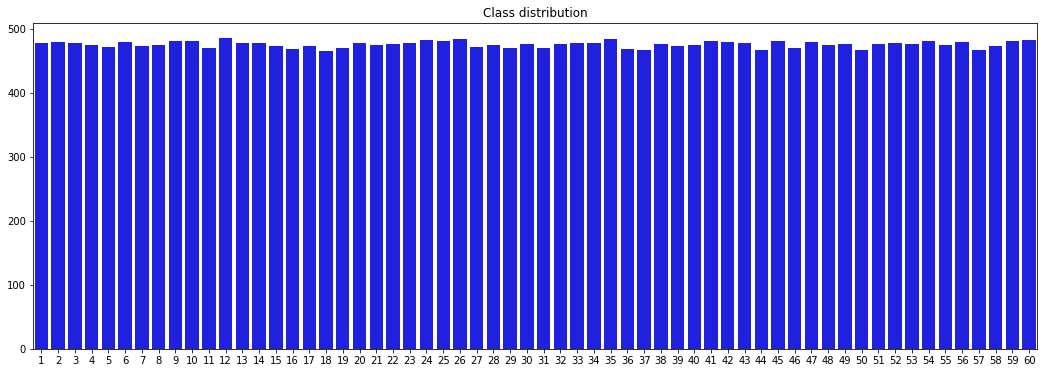

In [25]:
# Plot class distribution
plot_class_distribution(y_train_label_1['label_1'])

In [31]:
# Robust scaling
X_train_label_1, X_valid_label_1, X_test_label_1 = robust_scale_data(
    X_train_label_1, X_valid_label_1, X_test_label_1)

In [29]:
# Standard scaling
X_train_label_1, X_valid_label_1, X_test_label_1 = standard_scale_data(
    X_train_label_1, X_valid_label_1, X_test_label_1)

In [32]:
# Apply PCA
X_train_trf_label_1, X_valid_trf_label_1, X_test_trf_label_1 = pca(
    X_train_label_1, X_valid_label_1, X_test_label_1, n_components=0.98)

In [33]:
X_train_trf_label_1.shape

(28520, 278)

In [34]:
param_grid = {'C': [100, 10, 1, 0.1],
              'kernel': ['rbf', 'linear'],
              }

# Support Vector Machine Best Model
best_model_1 = svc(X_train_trf_label_1, y_train_label_1, X_valid_trf_label_1, y_valid_label_1, param_grid)

d:\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

  y = column_or_1d(y, warn=True)

d:\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

  y = column_or_1d(y, warn=True)


Tuned hyperparameters: {'kernel': 'rbf', 'C': 100}

Best score: 0.9287868162692847

Accuracy score 0.945


In [35]:
# Predict using selected Model ('kernel': 'rbf', 'C': 100)

y_pred_label_1 = best_model_1.predict(X_valid_trf_label_1)
score_label_1 = accuracy_score(y_valid_label_1, y_pred_label_1)
print("Accuracy score {:.3f}".format(score_label_1))


Accuracy score 0.945


In [36]:
# Predict test data
y_test_pred_label_1 = best_model_1.predict(X_test_trf_label_1)

In [37]:
# Create output csv file for label_1
create_output_csv(y_test_pred_label_1, "label_1")

# `label_2` : Speaker Age

In [49]:
# Split X and y
X_train_label_2 = train_data.iloc[:, :-4]
y_train_label_2 = train_data['label_2']
X_valid_label_2 = valid_data.iloc[:, :-4]
y_valid_label_2 = valid_data['label_2']
X_test_label_2 = test_data.iloc[:, 1:]

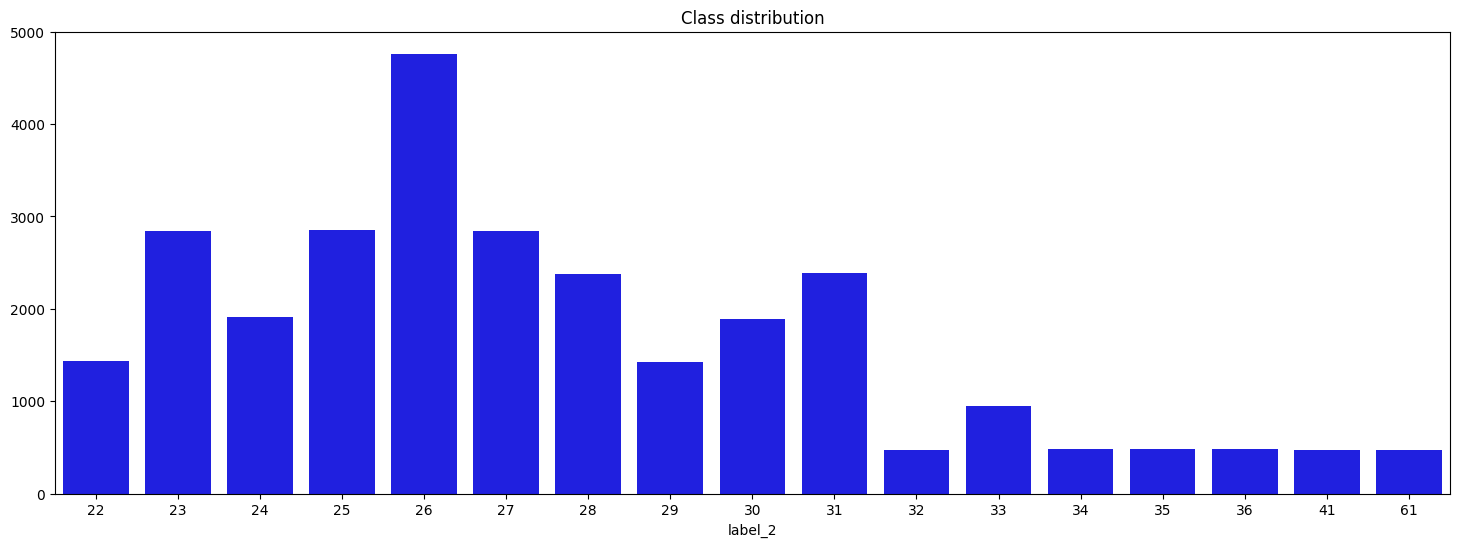

In [50]:
# Plot class distribution
plot_class_distribution(y_train_label_2)

In [51]:
# Robust scaling
X_train_label_2, X_valid_label_2, X_test_label_2 = robust_scale_data(
    X_train_label_2, X_valid_label_2, X_test_label_2)

In [52]:
# SMOTE Oversampling
X_train_resampled_label_2, y_train_resampled_label_2 = smote_oversampling(
    X_train_label_2, y_train_label_2, verbose=1)

Before SMOTE: Counter({26: 4762, 25: 2849, 27: 2846, 23: 2842, 31: 2385, 28: 2379, 24: 1906, 30: 1894, 22: 1432, 29: 1424, 33: 945, 36: 481, 35: 480, 34: 478, 32: 476, 41: 474, 61: 467})
After SMOTE: Counter({28: 4762, 25: 4762, 27: 4762, 23: 4762, 33: 4762, 34: 4762, 22: 4762, 30: 4762, 26: 4762, 24: 4762, 31: 4762, 29: 4762, 61: 4762, 36: 4762, 32: 4762, 35: 4762, 41: 4762})


In [53]:
# Apply PCA
X_train_trf_label_2, X_valid_trf_label_2, X_test_trf_label_2 = pca(
    X_train_resampled_label_2, X_valid_label_2, X_test_label_2, n_components=0.99)

In [54]:
X_train_trf_label_2.shape

(80954, 351)

In [55]:
param_grid = {'C': [100, 10, 1, 0.1],
              'kernel': ['rbf'],}

# Support Vector Machine Best Model
best_model_2 = svc(X_train_trf_label_2, y_train_resampled_label_2,
                   X_valid_trf_label_2, y_valid_label_2, param_grid=param_grid, n_iter=1, cv=3)


Tuned hyperparameters: {'kernel': 'rbf', 'C': 10}
Best score: 0.9367666870961516
Accuracy score 0.904


In [57]:
# Predict using selected Model ('kernel': 'rbf', 'C': 10)
y_pred_label_2 = best_model_2.predict(X_valid_trf_label_2)
score_label_2 = accuracy_score(y_valid_label_2, y_pred_label_2)
print("Accuracy score {:.3f}".format(score_label_2))


Accuracy score 0.904


In [58]:
# Predict test data
y_test_pred_label_2 = best_model_2.predict(X_test_trf_label_2)

In [35]:
# Create output csv file for label_2
create_output_csv(y_test_pred_label_2, "label_2")

# `label_3` : Speaker Gender

In [39]:
# Split X and y
X_train_label_3 = train_data.iloc[:, :-4]
y_train_label_3 = train_data['label_3']
X_valid_label_3 = valid_data.iloc[:, :-4]
y_valid_label_3 = valid_data['label_3']
X_test_label_3 = test_data.iloc[:, 1:]

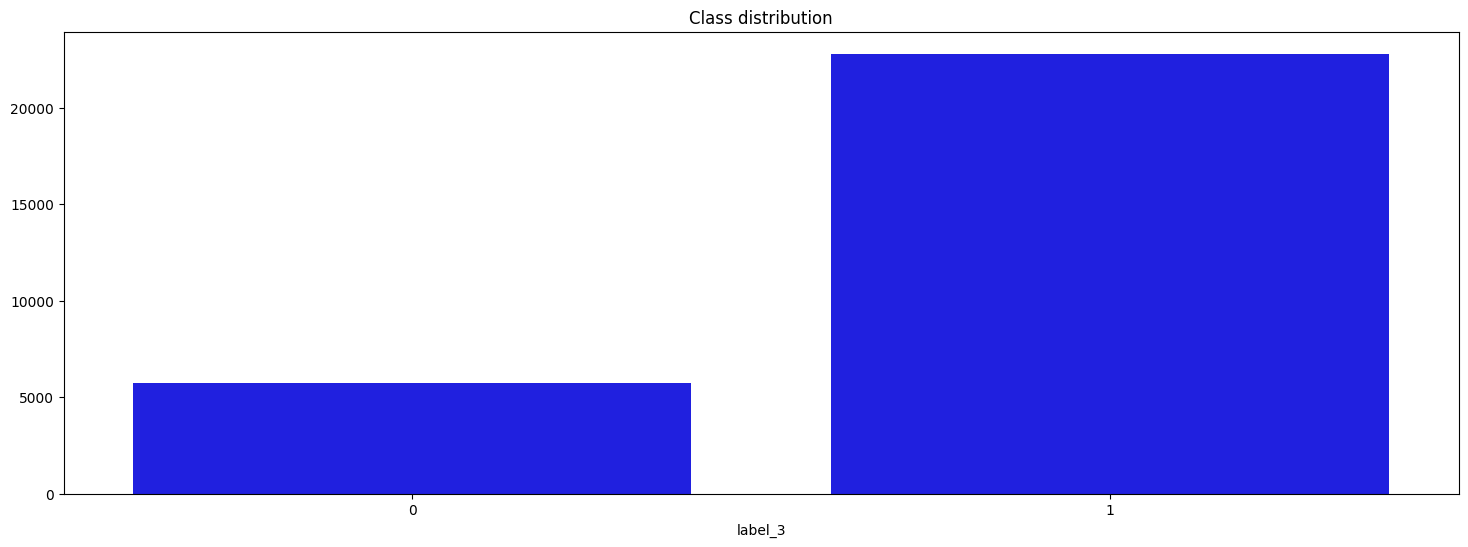

In [40]:
# Plot class distribution
plot_class_distribution(y_train_label_3)

In [41]:
# Robust scaling
X_train_label_3, X_valid_label_3, X_test_label_3 = robust_scale_data(
    X_train_label_3, X_valid_label_3, X_test_label_3)

In [42]:
# SMOTE Oversampling
X_train_resampled_label_3, y_train_resampled_label_3 = smote_oversampling(
    X_train_label_3, y_train_label_3, verbose=1)

Before SMOTE: Counter({1: 22796, 0: 5724})
After SMOTE: Counter({1: 22796, 0: 22796})


In [43]:
# Apply PCA
X_train_trf_label_3, X_valid_trf_label_3, X_test_trf_label_3 = pca(
    X_train_resampled_label_3, X_valid_label_3, X_test_label_3, n_components=0.98)

In [44]:
X_train_trf_label_3.shape

(45592, 262)

In [45]:
param_grid = {'C': [100, 10, 1, 0.1],
              'kernel': ['rbf'],
              }

# Support Vector Machine Best Model
best_model_3 = svc(X_train_trf_label_3, y_train_resampled_label_3,
                   X_valid_trf_label_3, y_valid_label_3, param_grid=param_grid, n_iter=2, cv=3)

Tuned hyperparameters: {'kernel': 'rbf', 'C': 10}
Best score: 0.9947798907967792
Accuracy score 0.996


In [46]:
# Predict using selected Model ('kernel': 'rbf', 'C': 10)

y_pred_label_3 = best_model_3.predict(X_valid_trf_label_3)
score_label_3 = accuracy_score(y_valid_label_3, y_pred_label_3)
print("Accuracy score {:.3f}".format(score_label_3))

Accuracy score 0.996


In [47]:
# Predict test data
y_test_pred_label_3 = best_model_3.predict(X_test_trf_label_3)

In [48]:
# Create output csv file for label_3
create_output_csv(y_test_pred_label_3, "label_3")

# `label_4` : Speaker Accent

In [27]:
# Split X and y
X_train_label_4 = train_data.iloc[:, :-4]
y_train_label_4 = train_data['label_4']
X_valid_label_4 = valid_data.iloc[:, :-4]
y_valid_label_4 = valid_data['label_4']
X_test_label_4 = test_data.iloc[:, 1:]

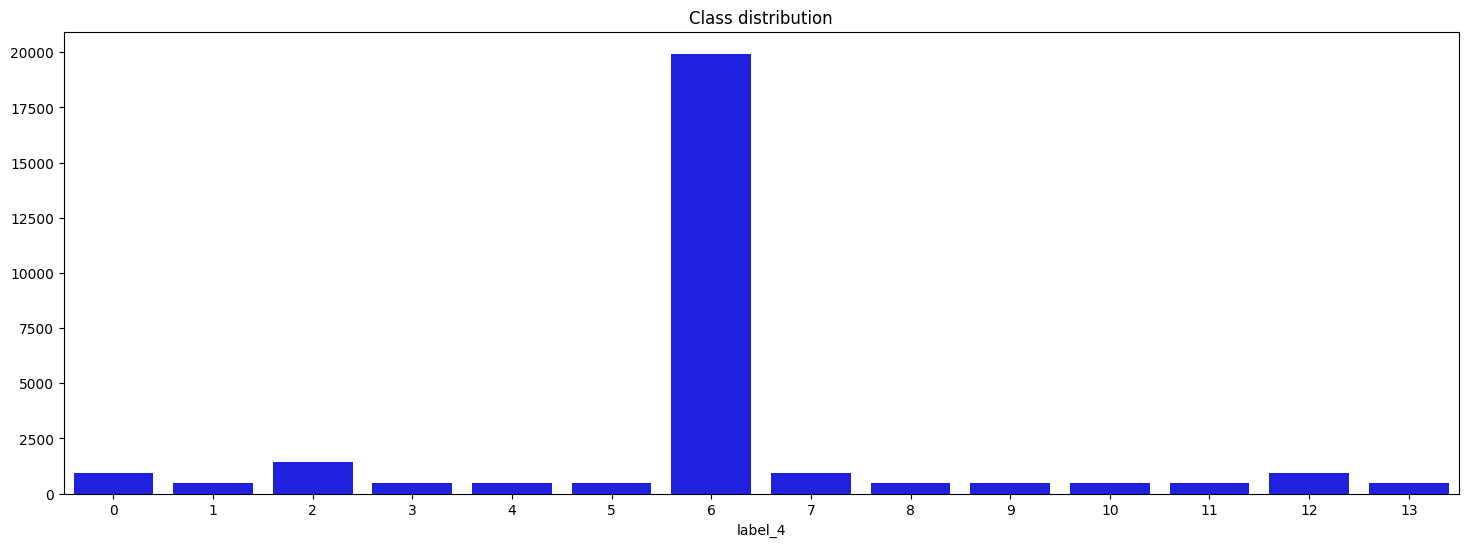

In [28]:
# Plot class distribution
plot_class_distribution(y_train_label_4)

In [29]:
# Robust scaling
X_train_label_4, X_valid_label_4, X_test_label_4 = robust_scale_data(
    X_train_label_4, X_valid_label_4, X_test_label_4)

In [30]:
# SMOTE Oversampling
X_train_resampled_label_4, y_train_resampled_label_4 = smote_oversampling(
    X_train_label_4, y_train_label_4, verbose=1)

Before SMOTE: Counter({6: 19938, 2: 1449, 0: 955, 12: 954, 7: 938, 13: 482, 1: 481, 11: 480, 10: 480, 3: 479, 5: 478, 9: 472, 4: 469, 8: 465})
After SMOTE: Counter({6: 19938, 13: 19938, 4: 19938, 5: 19938, 1: 19938, 2: 19938, 7: 19938, 3: 19938, 0: 19938, 12: 19938, 9: 19938, 8: 19938, 11: 19938, 10: 19938})


In [31]:
# Apply PCA
X_train_trf_label_4, X_valid_trf_label_4, X_test_trf_label_4 = pca(
    X_train_resampled_label_4, X_valid_label_4, X_test_label_4, n_components=0.98)

In [32]:
X_train_trf_label_4.shape

(279132, 220)

In [33]:
param_grid = {'C': [100, 10],
              'kernel': ['rbf'],
              }

# Support Vector Machine Best Model
best_model_4 = svc(X_train_trf_label_4, y_train_resampled_label_4,
                   X_valid_trf_label_4, y_valid_label_4, param_grid=param_grid, n_iter=1, cv=3)

Tuned hyperparameters: {'kernel': 'rbf', 'C': 10}
Best score: 0.9912765286674405
Accuracy score 0.948


In [34]:
# Predict using selected Model ('kernel': 'rbf', 'C': 10)

y_pred_label_4 = best_model_4.predict(X_valid_trf_label_4)
score_label_4 = accuracy_score(y_valid_label_4, y_pred_label_4)
print("Accuracy score {:.3f}".format(score_label_4))

Accuracy score 0.948


In [36]:
# Predict test data
y_test_pred_label_4 = best_model_4.predict(X_test_trf_label_4)

In [38]:
# Create output csv file for label_4
create_output_csv(y_test_pred_label_4, "label_4")

# Final Output

In [64]:
output_filename = f"Results/final.csv"
final_combined_data = pd.DataFrame()
final_combined_data["ID"] = test_data["ID"]
for i in range(1, 5):
  label_name = f"label_{i}"
  final_combined_data[label_name] = pd.read_csv(
      f"Results/{label_name}.csv")
final_combined_data.to_csv(output_filename, index=False)